In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import silhouette_score,silhouette_samples
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
! pip install 'plotnine[all]'

     |████████████████████████████████| 8.8 MB 4.2 MB/s 


In [6]:
!pip install kneed

In [29]:
%matplotlib inline
from plotnine import *
from sklearn.cluster import DBSCAN 

# **before** **normalizing the iris dataset **

In [9]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters 

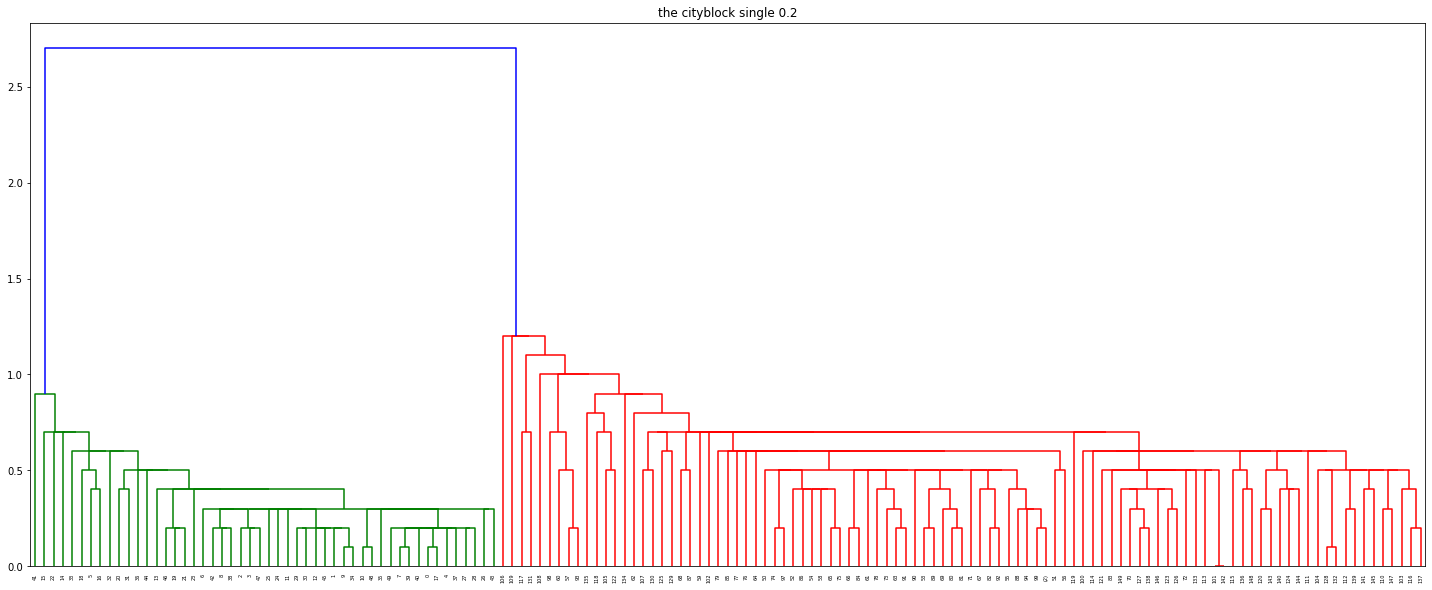

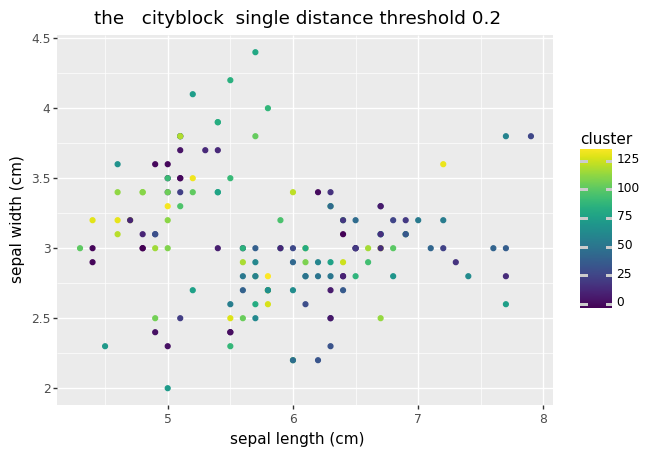

<ggplot: (8754552613305)>


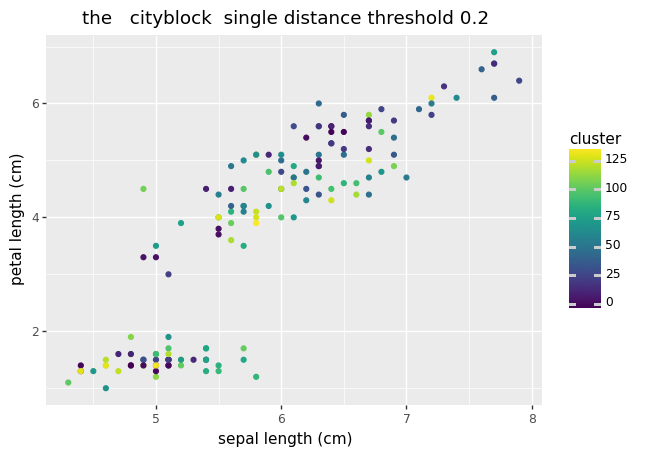

<ggplot: (8754532126773)>


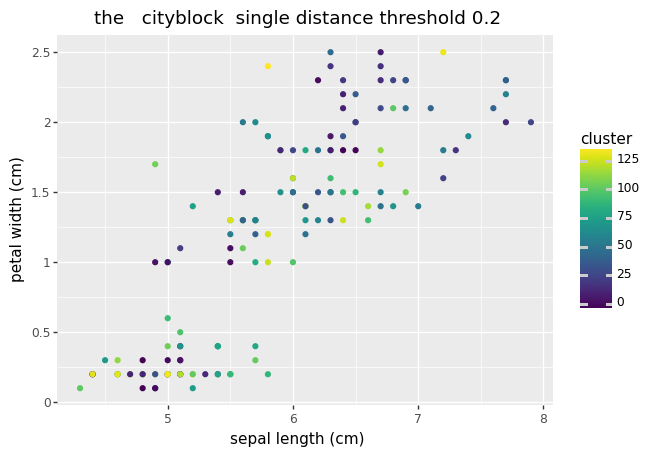

<ggplot: (8754532004873)>


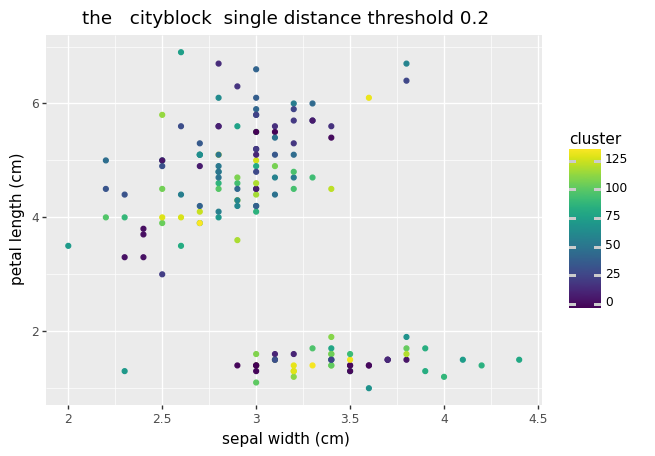

<ggplot: (8754531978801)>


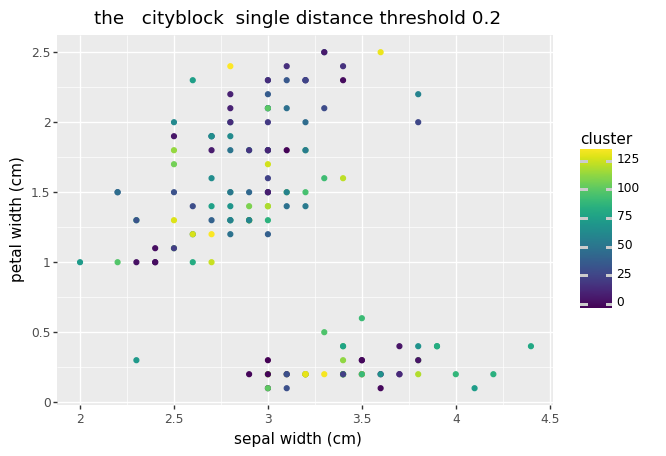

<ggplot: (8754531978765)>


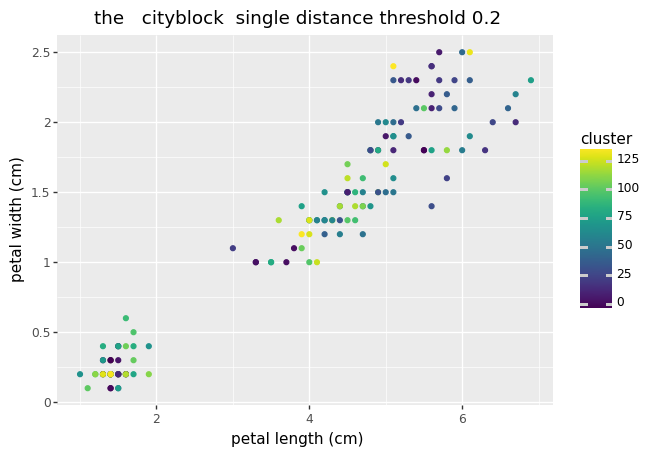

<ggplot: (8754531895821)>


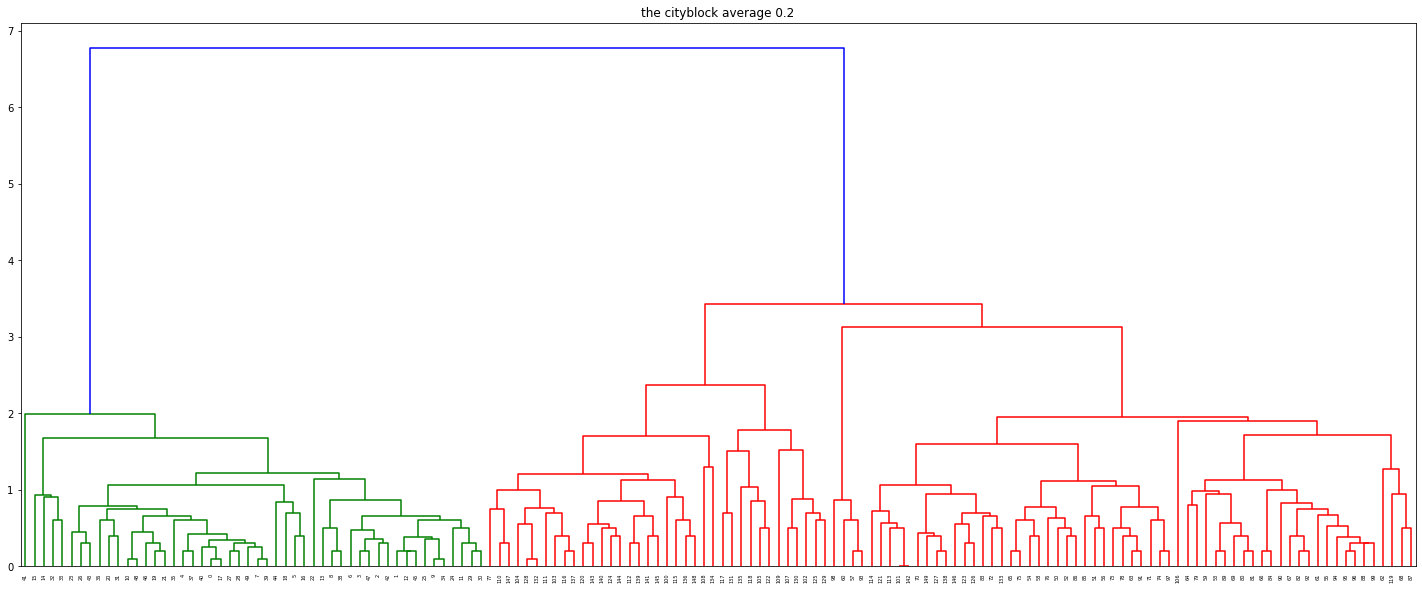

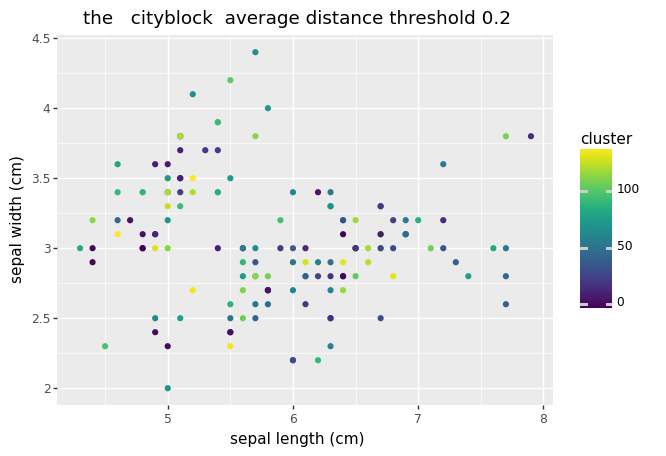

<ggplot: (8754531820021)>


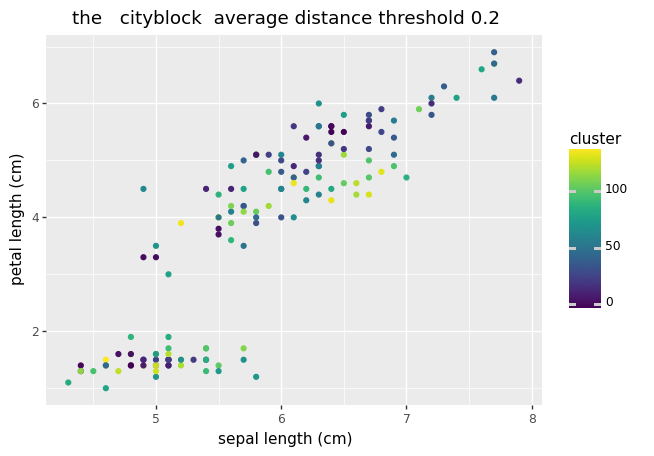

<ggplot: (8754531853053)>


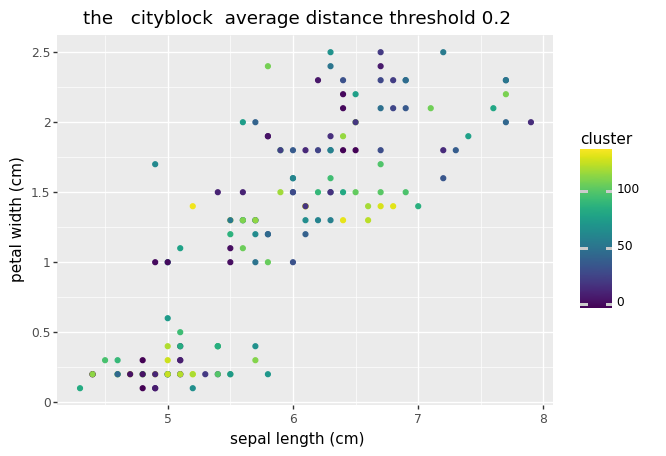

<ggplot: (8754531843625)>


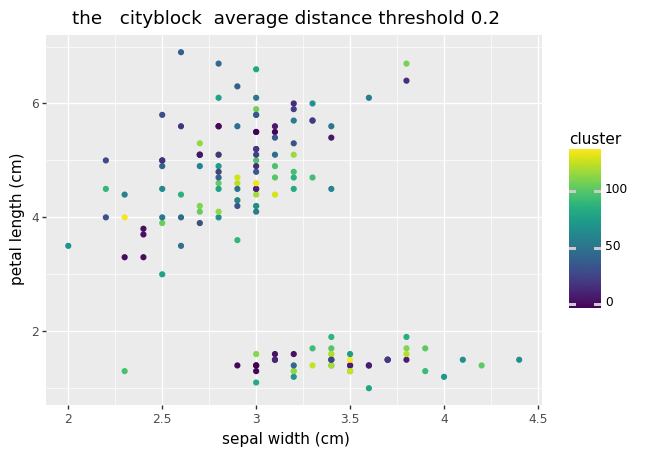

<ggplot: (8754532027381)>


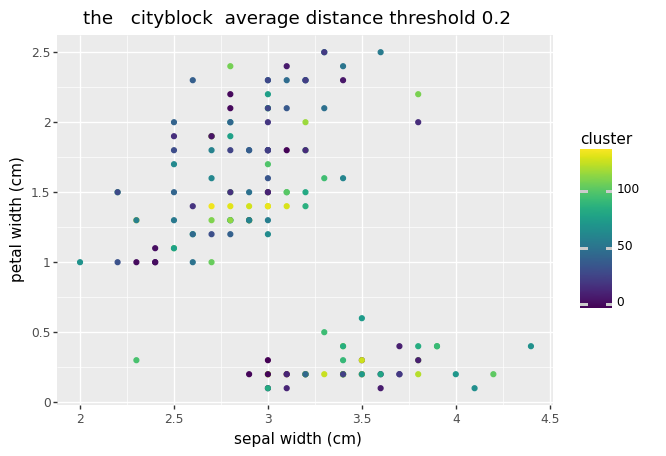

<ggplot: (8754532027345)>


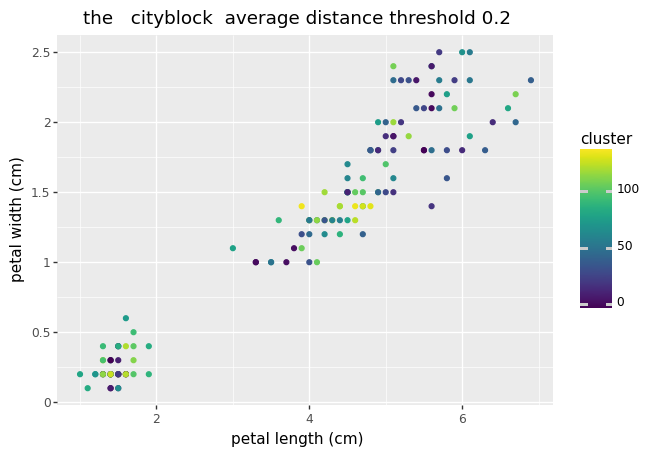

<ggplot: (8754532027381)>


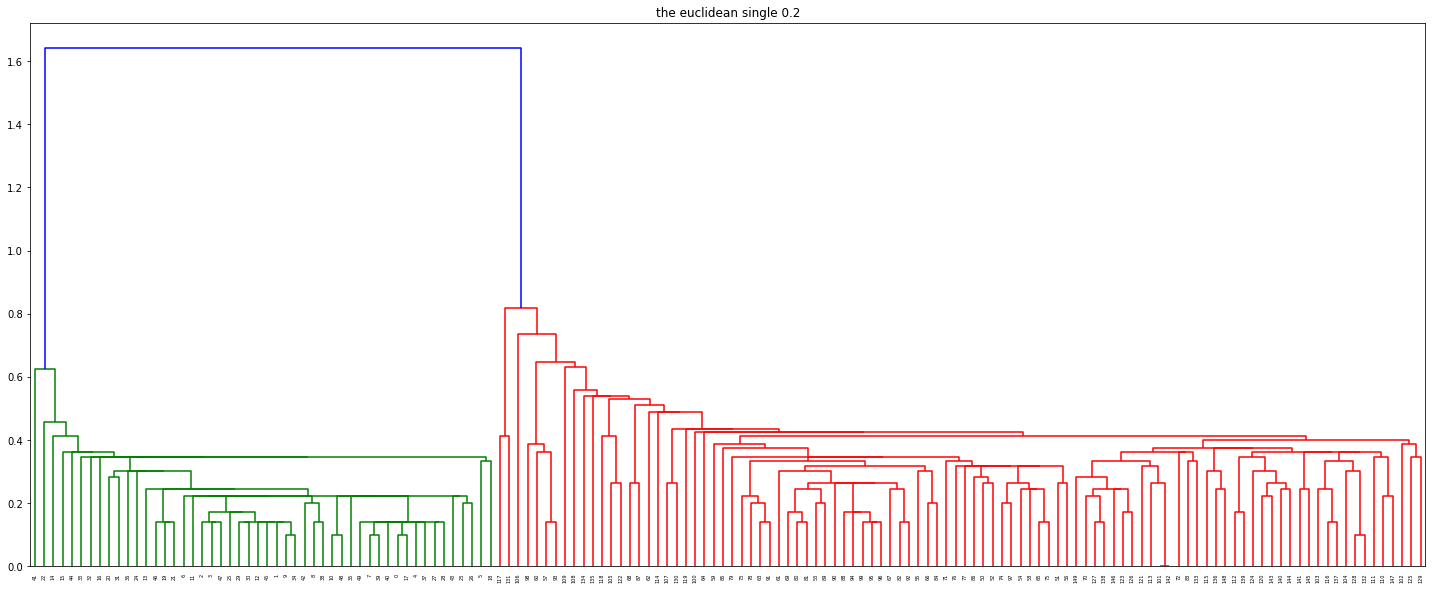

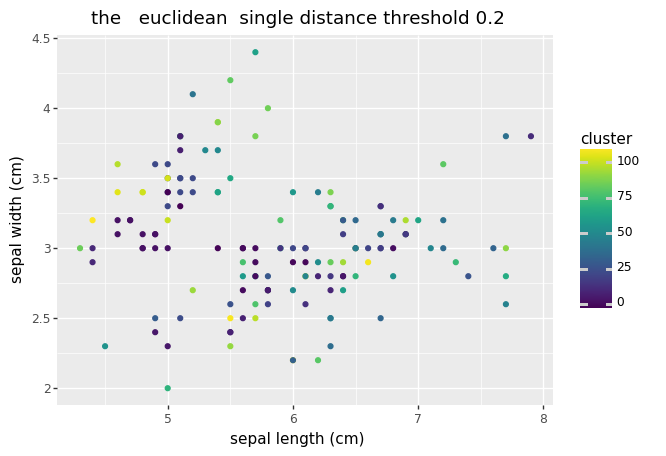

<ggplot: (8754531939801)>


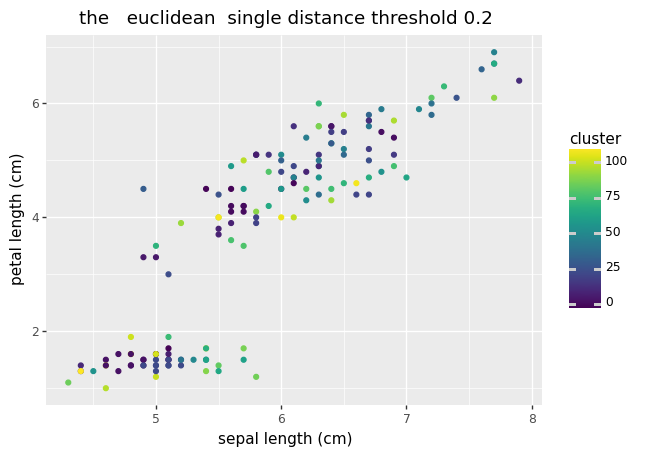

<ggplot: (8754531741325)>


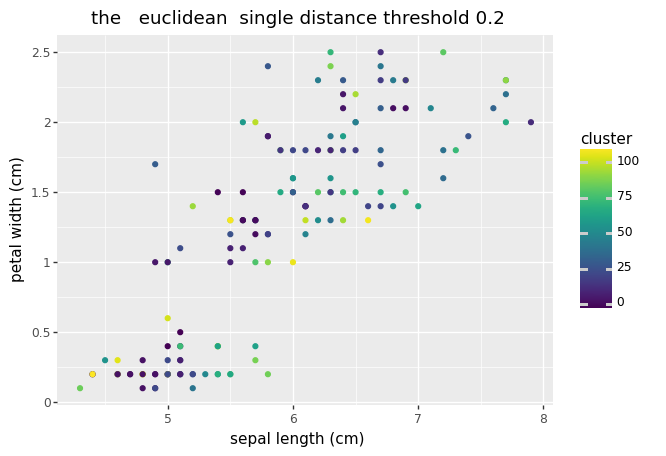

<ggplot: (8754532186309)>


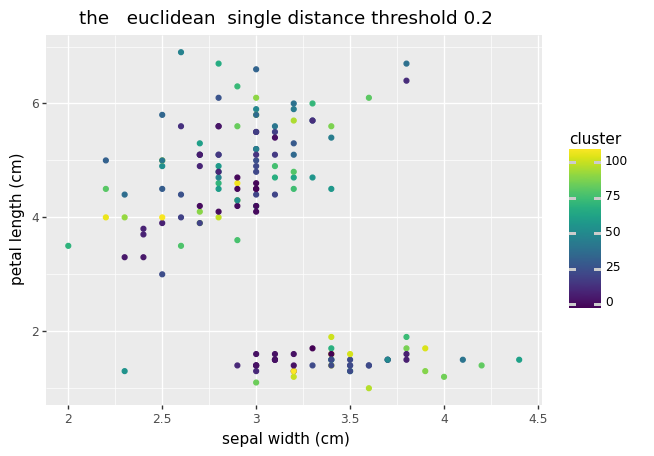

<ggplot: (8754531975857)>


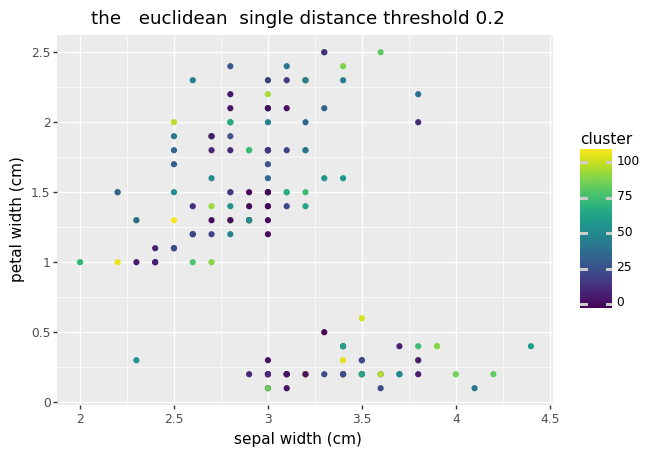

<ggplot: (8754531883789)>


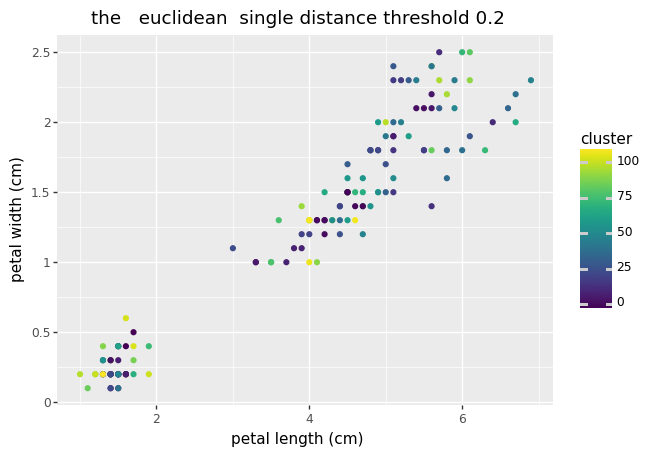

<ggplot: (8754532138761)>


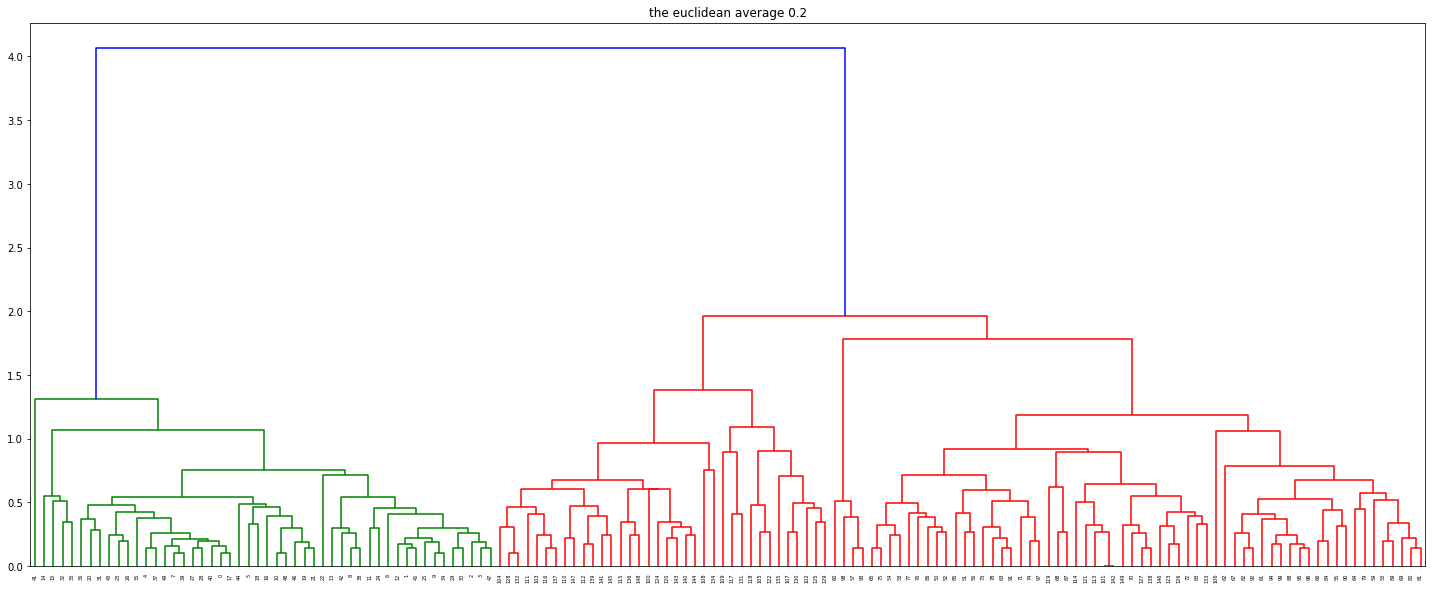

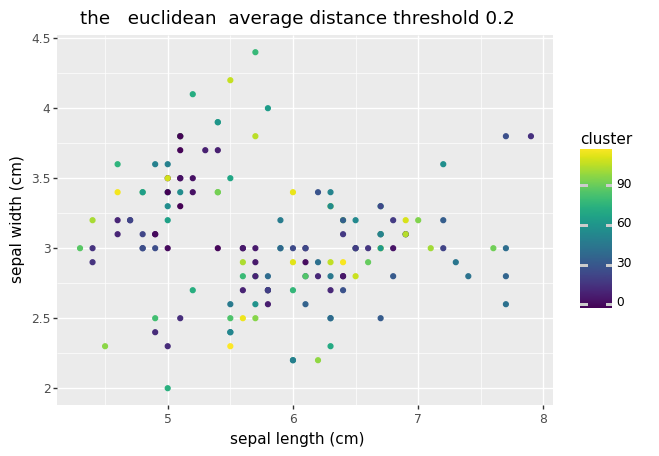

<ggplot: (8754549305309)>


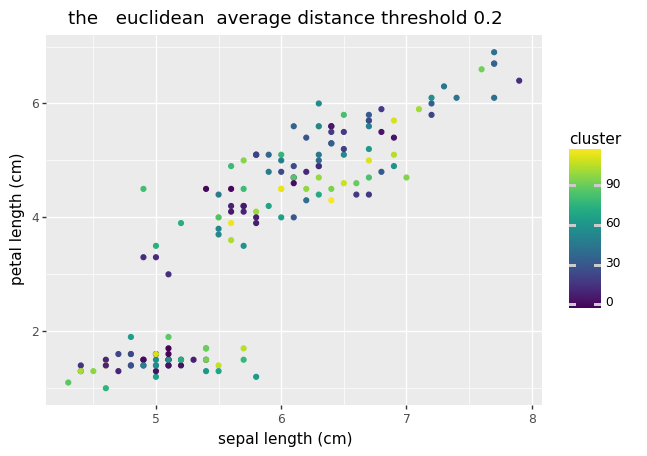

<ggplot: (8754531868425)>


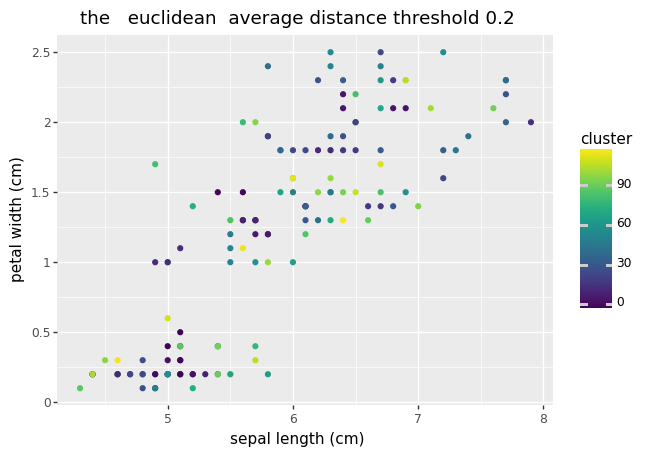

<ggplot: (8754532034377)>


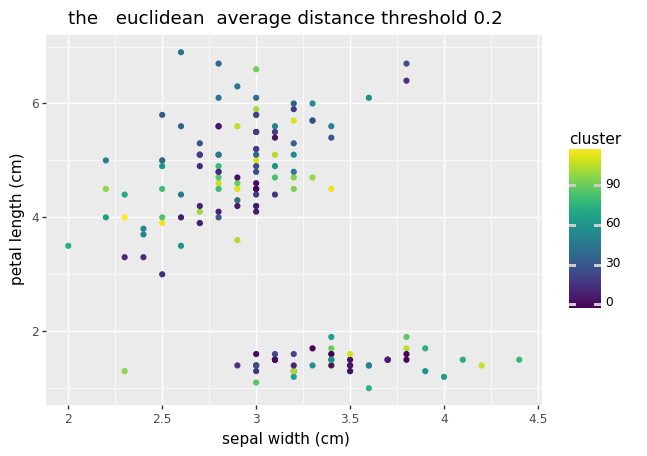

<ggplot: (8754532023993)>


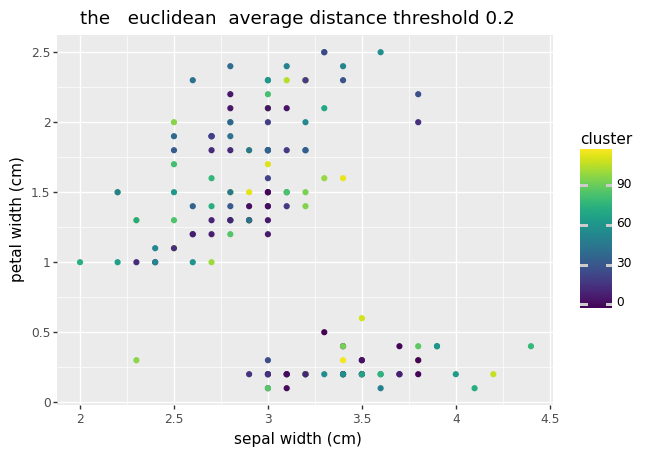

<ggplot: (8754549381629)>


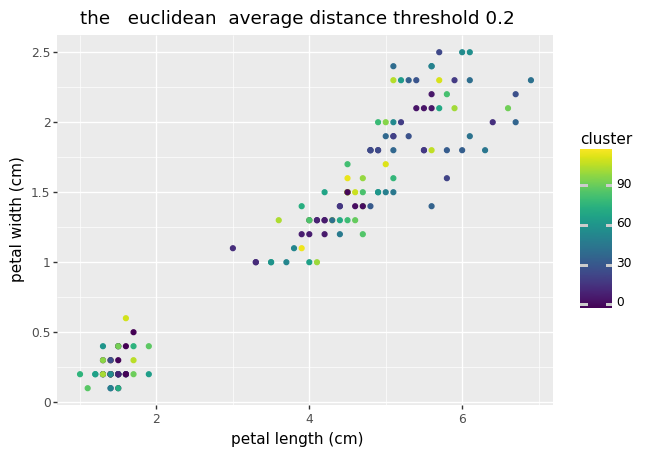

<ggplot: (8754549317173)>


In [10]:
max=0
affin=''
linkage1=''
dist_threshold=0
for x in ['cityblock','euclidean','cosine']:
  for y in ['single','average']:
    for j in np.arange(0.2, 0.4, 0.2):
      j=j.round(1)
      if 'cluster' in iris_df.columns:
       iris_df.drop('cluster', axis=1, inplace=True)
      model = AgglomerativeClustering(distance_threshold=j, n_clusters=None,affinity=x,linkage=y)
      model = model.fit(iris_df)
      if(len(np.unique(model.labels_))!=1):
        sil_score=silhouette_score(iris_df, model.labels_)
        if(max<sil_score):
          max=sil_score
          affin=x
          linkage1=y
          dist_threshold=j
        Z = linkage(iris_df, y,metric=x)
        fig = plt.figure(figsize=(25, 10))
        plt.title("the"+" "+str(x)+" "+str(y)+" "+str(j))
        dn = dendrogram(Z,truncate_mode='level')
        plt.show()
        z=model.labels_
        iris_df['cluster']=z
        c=len(iris_df.columns)-1
        for a in range(len(iris_df.columns)-1):
          for b in range(c-1):
            b=b+a+1 
            print(ggplot(iris_df,aes(x=iris_df.columns[a],y=iris_df.columns[b],color='cluster'))+geom_point()+ggtitle('the ' + '  '+str(x) + '  '+str(y)+' '+'distance threshold'+' '+str(j)))
          c=c-1
  
        

 

In [11]:
print(max)
print(affin)
print(linkage1)
print(dist_threshold)

0.15010607190438782
euclidean
average
0.2


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score  

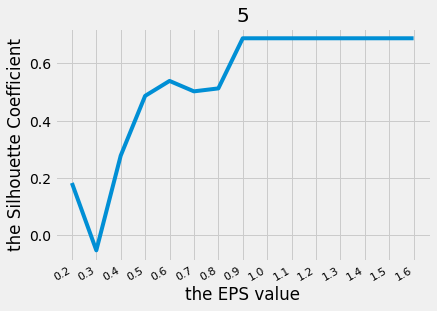

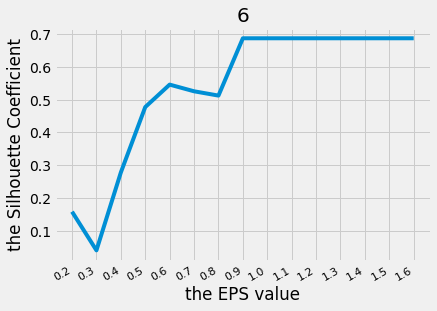

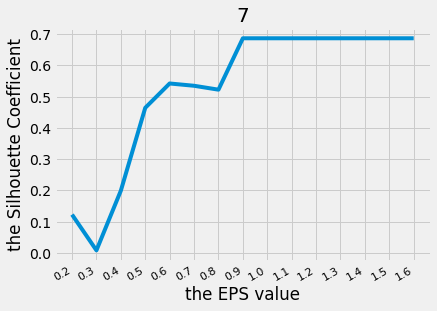

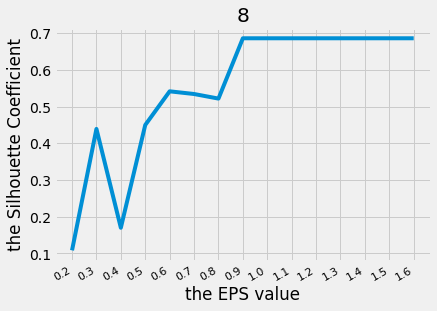

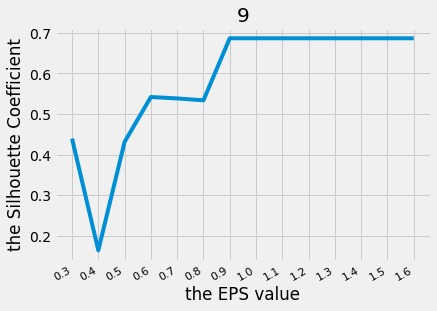

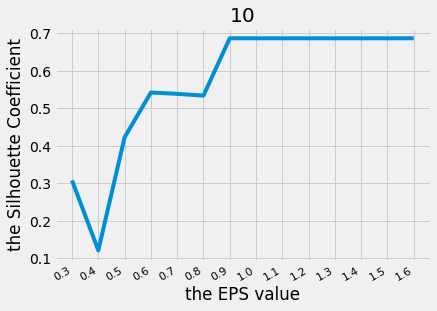

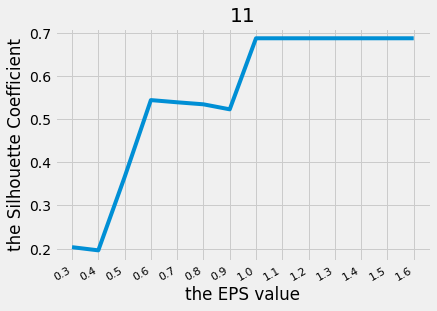

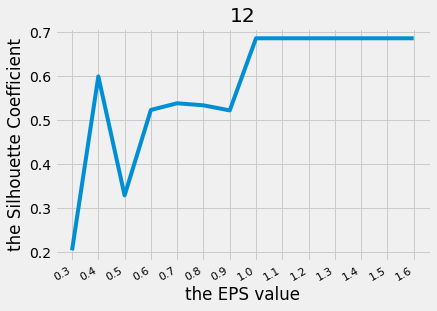

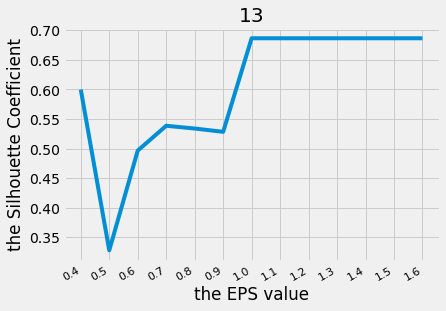

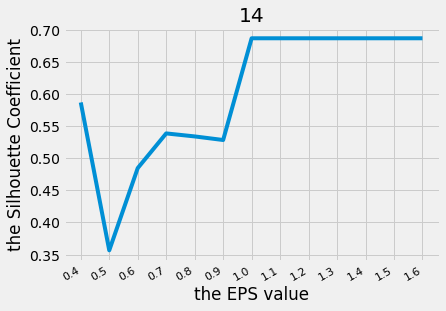

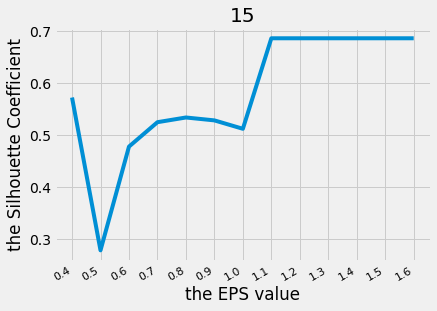

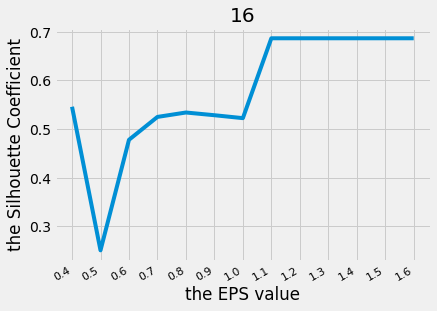

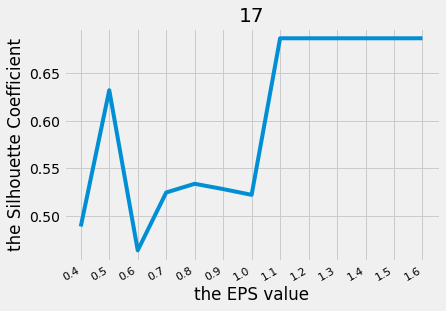

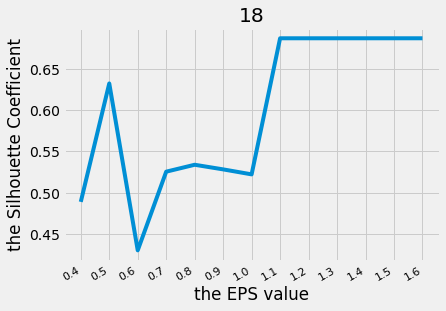

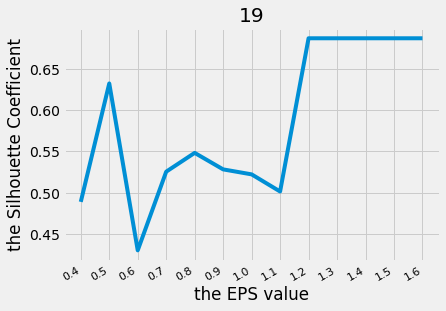

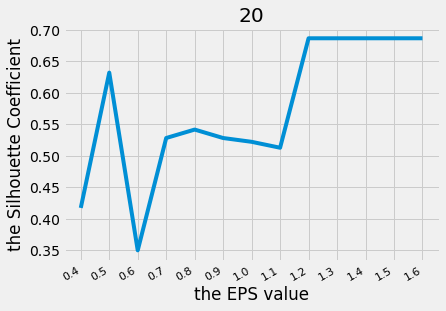

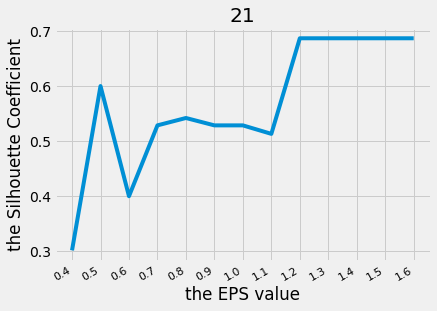

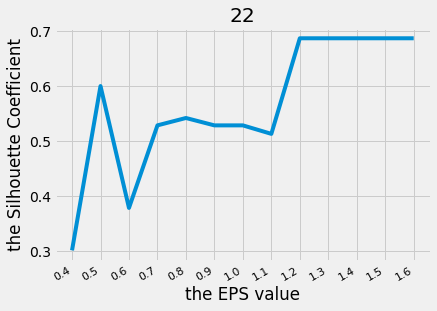

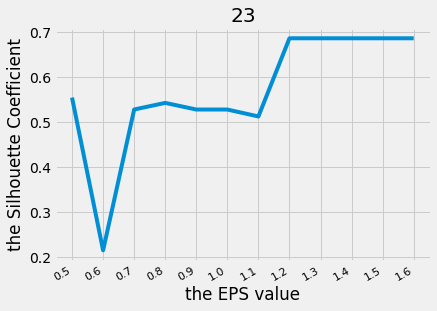

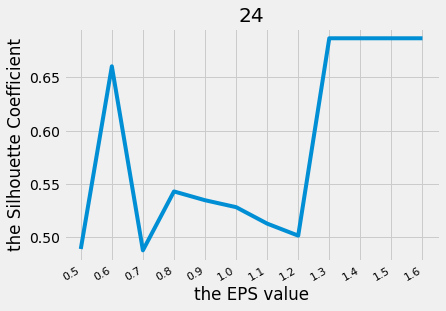

In [33]:
max_sil_coeff =0
best_eps=0
best_min_samples=0
for m in range(5,25,1):
  sil_coeff = []
  k_values=[]

  for k in np.arange(0.1, 3, 0.1): 
    k=k.round(1)
    dbscan = DBSCAN(eps=k, min_samples=m)


    if 'cluster' in iris_df.columns:
       iris_df.drop('cluster', axis=1, inplace=True)
    dbscan.fit(iris_df)
    if (len(np.unique(dbscan.labels_))==1):
      continue  
    k_values.append(k)
    dbscan_sil = silhouette_score(iris_df, dbscan.labels_)
    if (max_sil_coeff <= dbscan_sil): 
     max_sil_coeff =dbscan_sil
     best_eps=k
     best_min_samples=m
    sil_coeff.append(dbscan_sil)
  if(len(sil_coeff)!=0):
    ax= plt.subplot()   
    plt.style.use("fivethirtyeight")
    plt.title(m)
    plt.plot(k_values, sil_coeff)
    plt.xticks(k_values)
    plt.xticks(fontsize=11)
    plt.xlabel("the EPS value")
    plt.ylabel("the Silhouette Coefficient")
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
    plt.show() 


      


In [34]:
print(max_sil_coeff)
print(best_eps)
print(best_min_samples)


0.6867350732769777
1.6
24


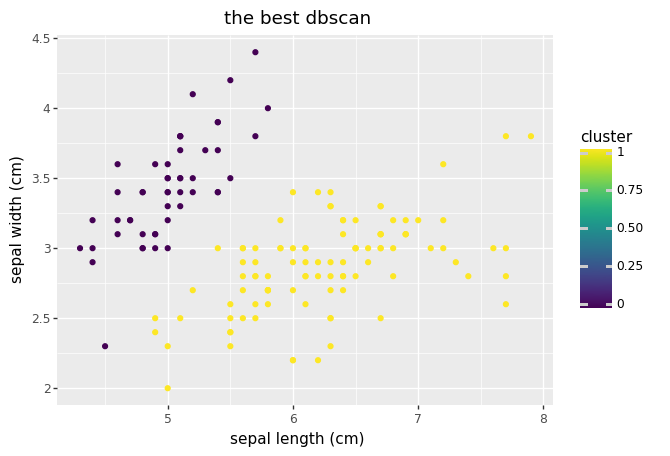

<ggplot: (8754531422805)>


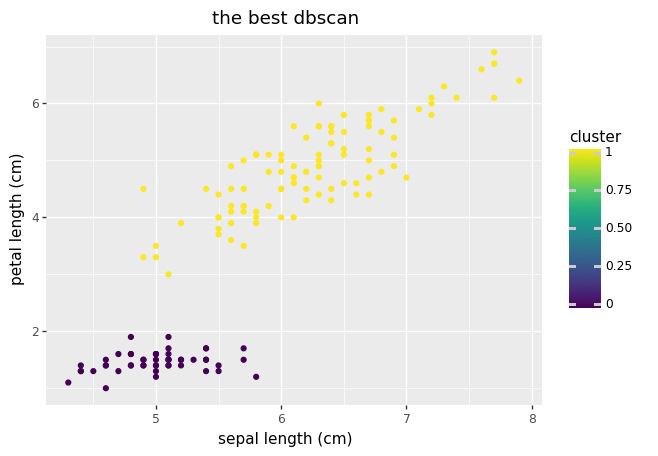

<ggplot: (8754552613305)>


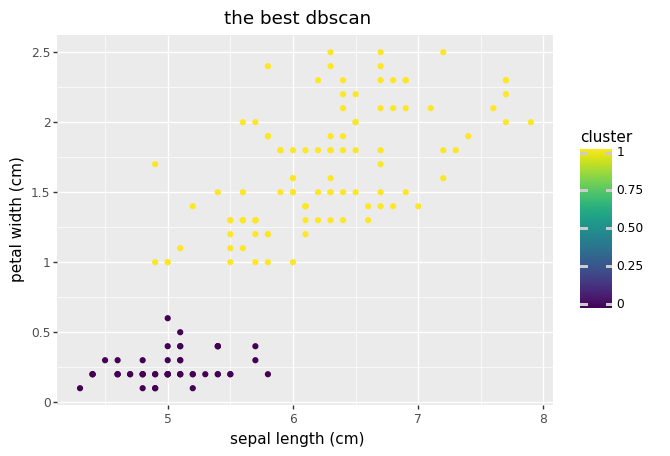

<ggplot: (8754531771329)>


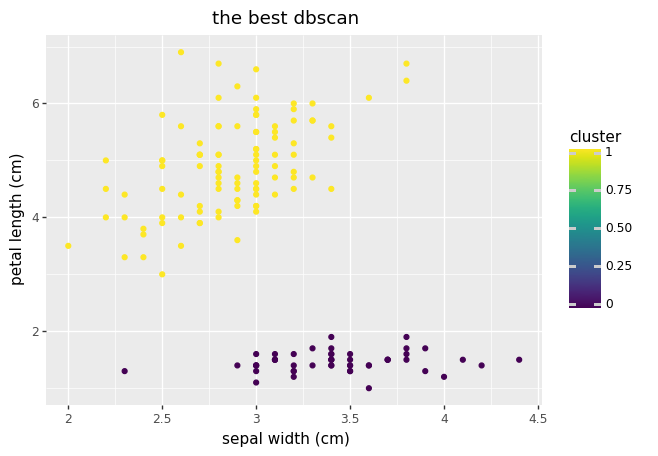

<ggplot: (8754531907873)>


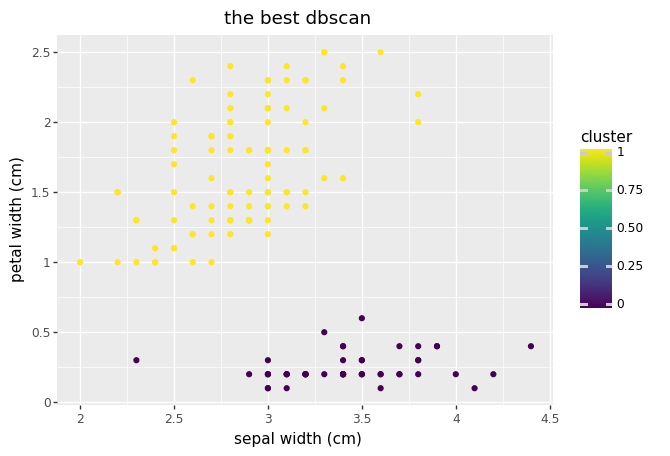

<ggplot: (8754531638481)>


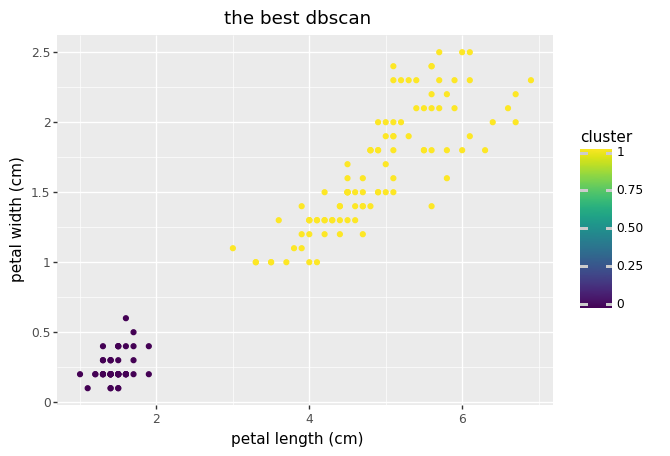

<ggplot: (8754549316357)>


In [35]:
  dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
  if 'cluster' in iris_df.columns:
   iris_df.drop('cluster', axis=1, inplace=True)
  dbscan.fit(iris_df)
  z=dbscan.labels_ 
  iris_df['cluster']=z
  count=len(iris_df.columns)-1
  for i in range(len(iris_df.columns)-1):
    for j in range(count-1):
      j=j+i+1 
      print(ggplot(iris_df,aes(x=iris_df.columns[i],y=iris_df.columns[j],color='cluster'))+geom_point()+ggtitle('the best dbscan'))
    count=count-1

# **after** **normalizing the iris dataset **


In [25]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(iris_df)
#normalized_X
print(normalized_X.data)
iris.feature_names
new_normalx=pd.DataFrame(data= np.c_[normalized_X], columns = iris.feature_names)
new_normalx

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.803773          0.551609           0.220644          0.031521
1             0.828133          0.507020           0.236609          0.033801
2             0.805333          0.548312           0.222752          0.034269
3             0.800030          0.539151           0.260879          0.034784
4             0.790965          0.569495           0.221470          0.031639
..                 ...               ...                ...               ...
145           0.721557          0.323085           0.560015          0.247699
146           0.729654          0.289545           0.579090          0.220054
147           0.716539          0.330710           0.573231          0.220474
148           0.674671          0.369981           0.587616          0.250281
149           0.690259          0.350979           0.596665          0.210588

[150 rows x 4 columns]

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

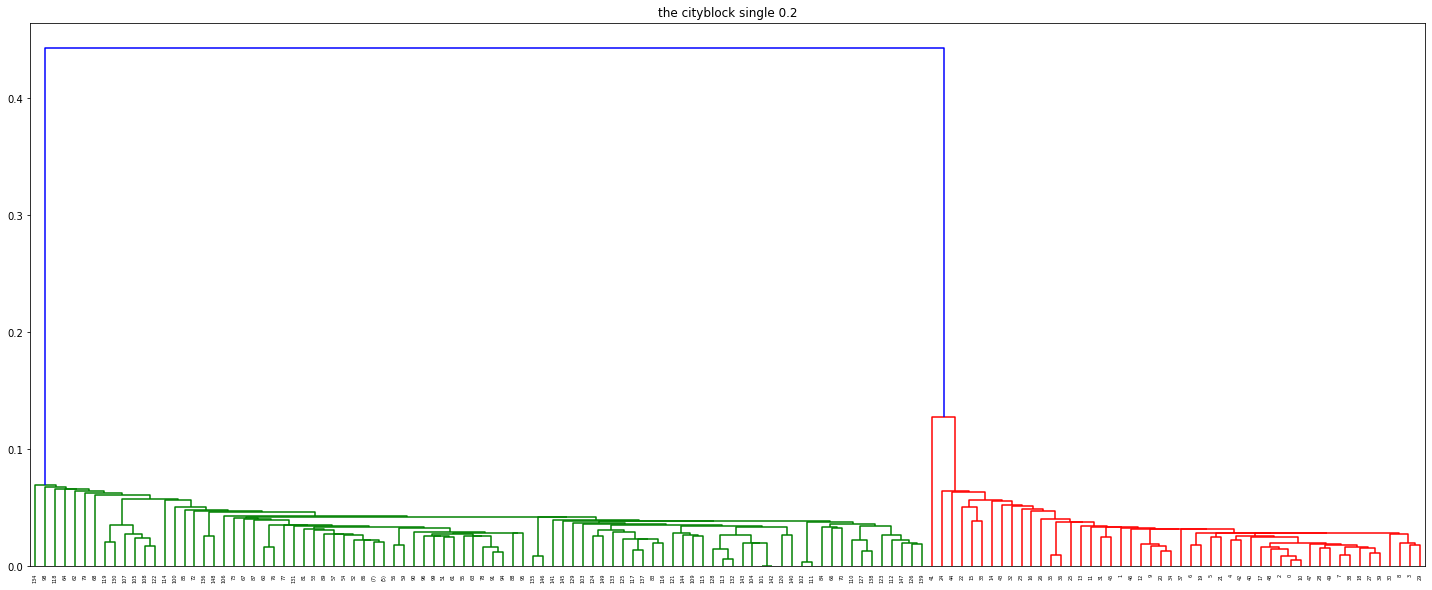

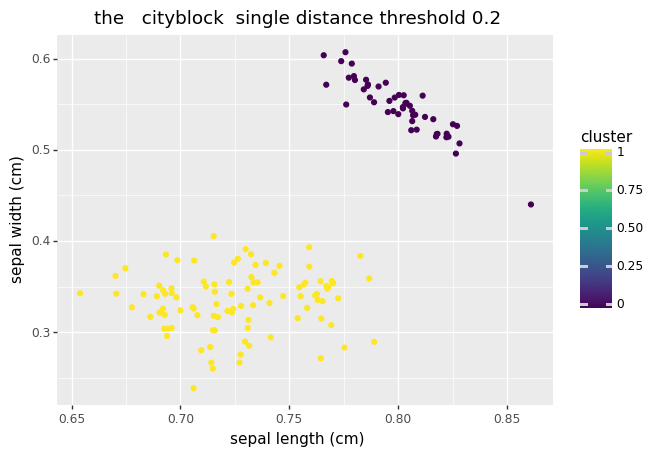

<ggplot: (8754531526649)>


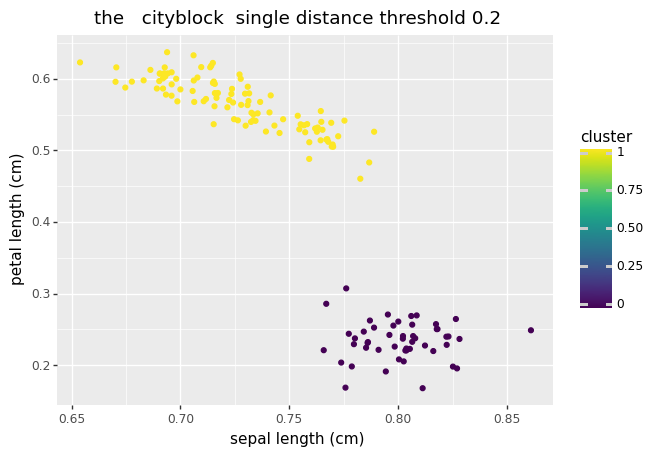

<ggplot: (8754531483461)>


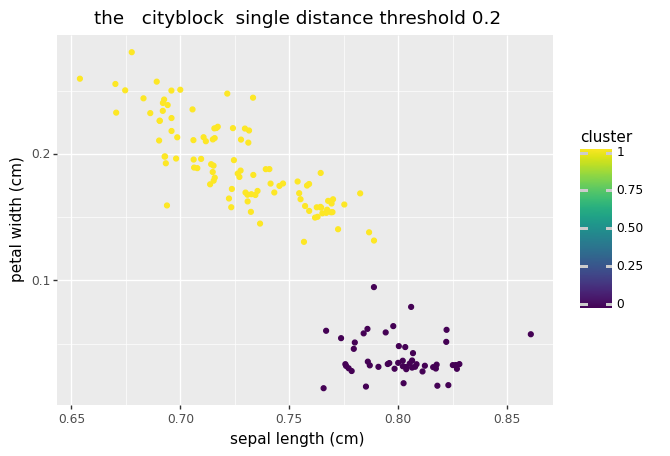

<ggplot: (8754531483461)>


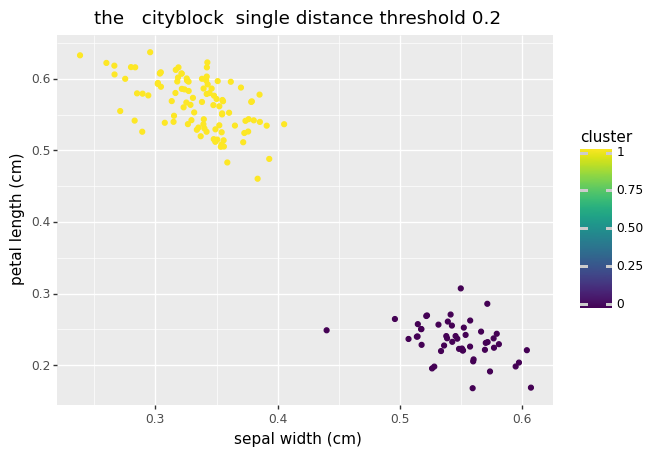

<ggplot: (8754531530865)>


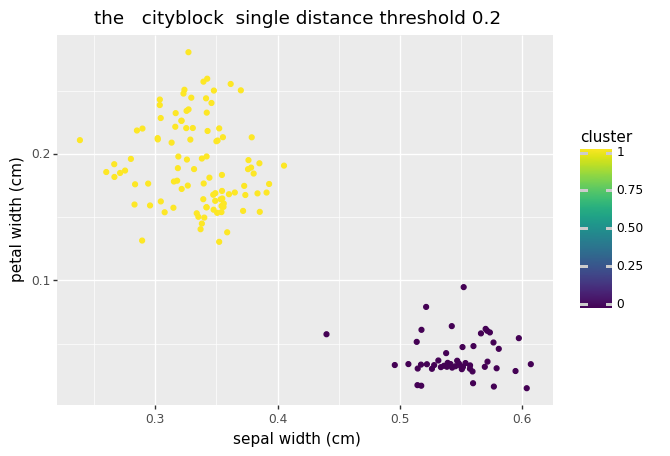

<ggplot: (8754531552065)>


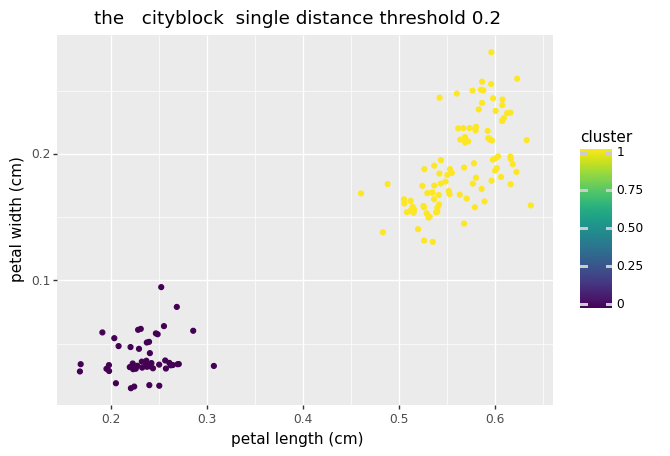

<ggplot: (8754531467405)>


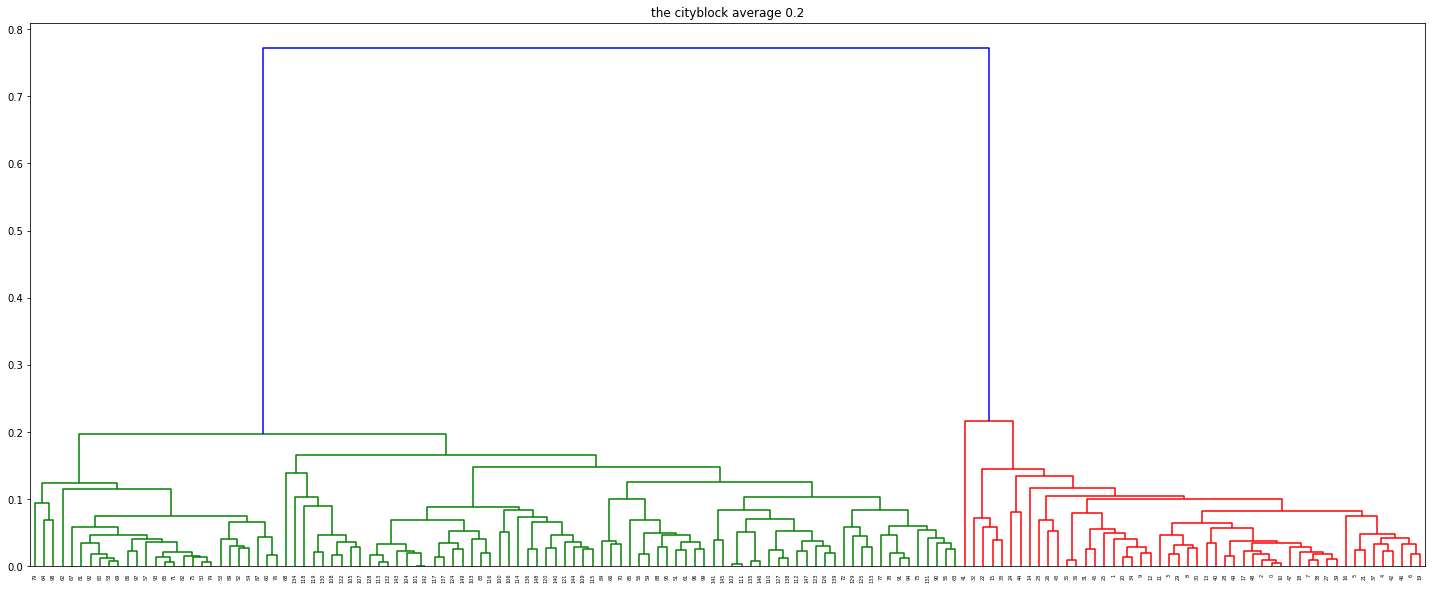

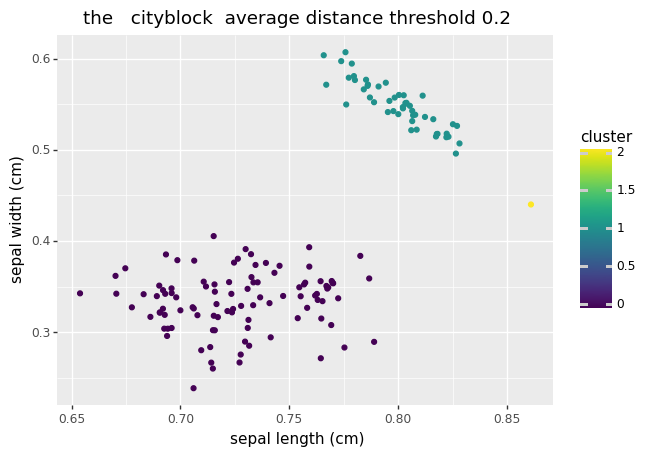

<ggplot: (8754532046733)>


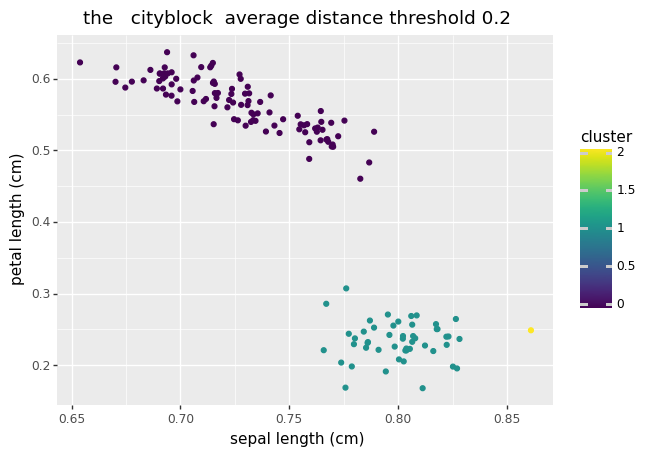

<ggplot: (8754549301349)>


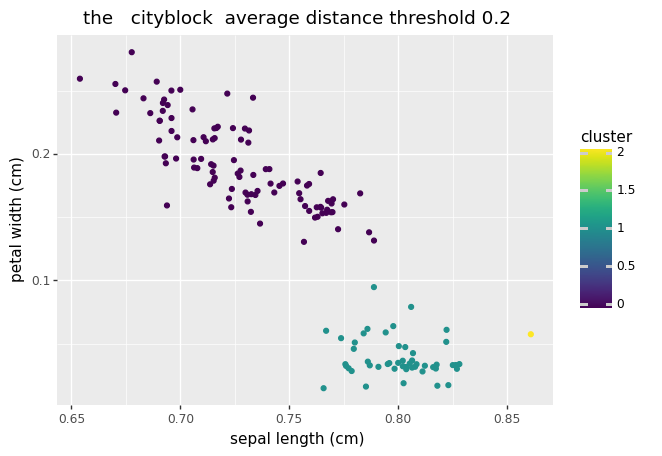

<ggplot: (8754531645673)>


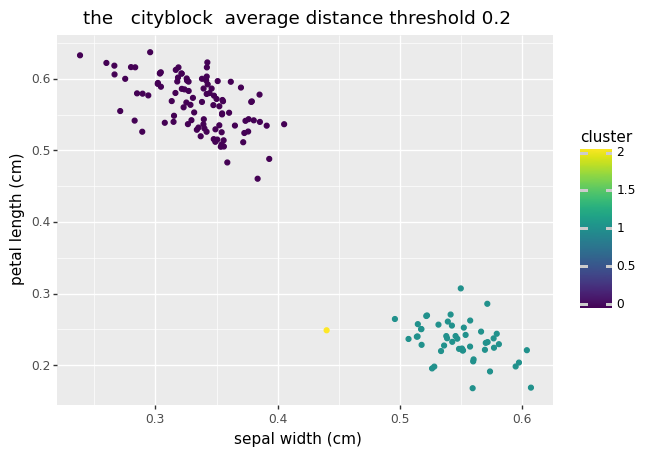

<ggplot: (8754549298237)>


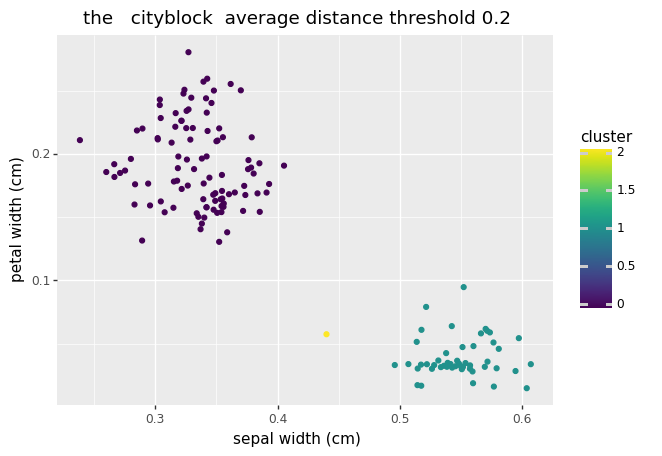

<ggplot: (8754552085845)>


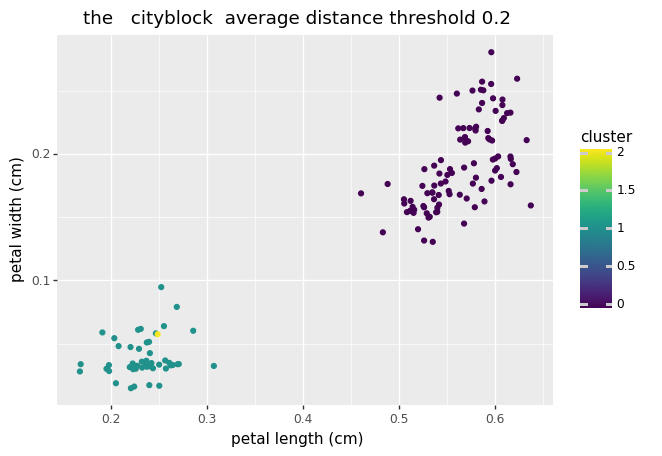

<ggplot: (8754531474073)>


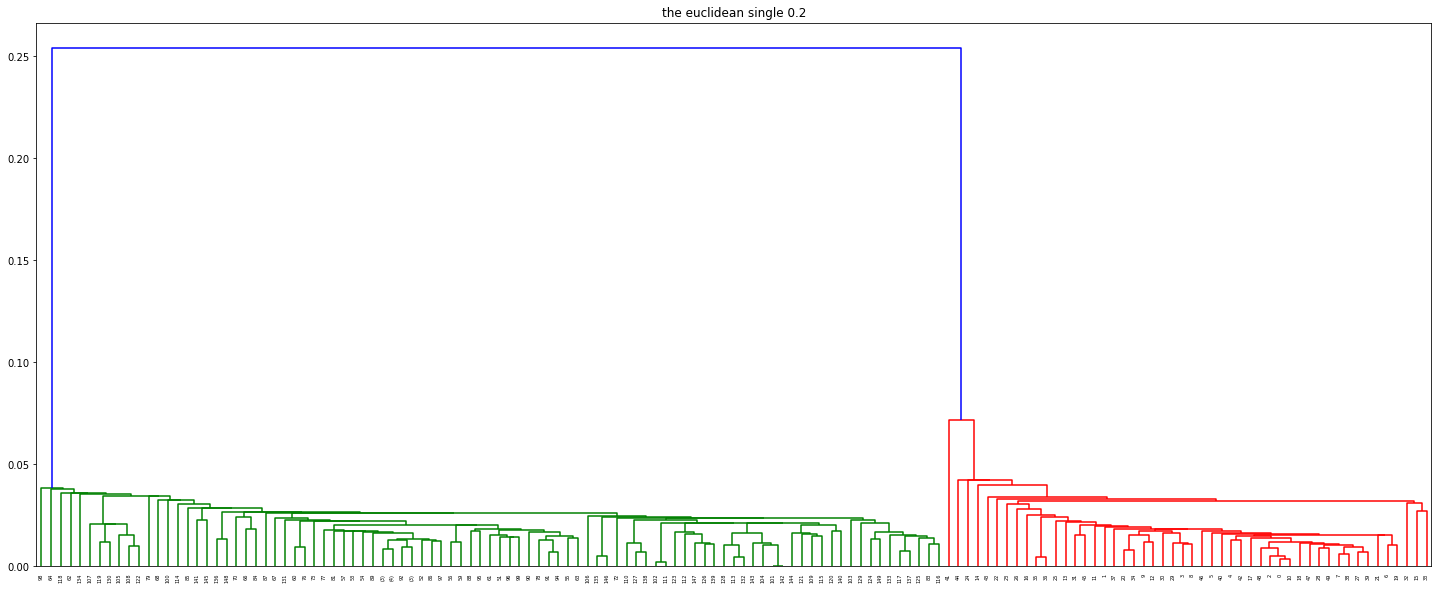

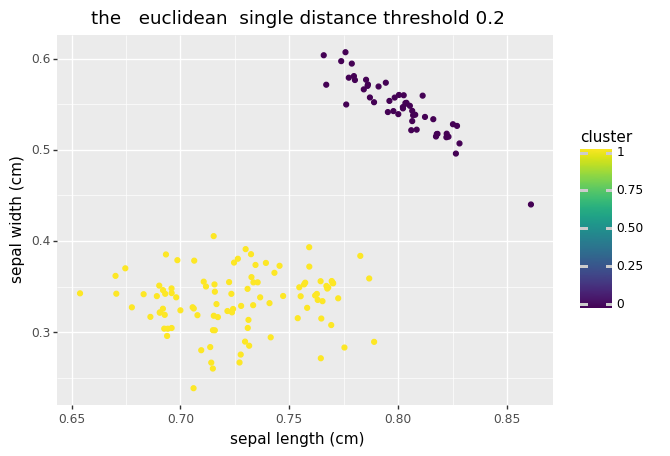

<ggplot: (8754532188729)>


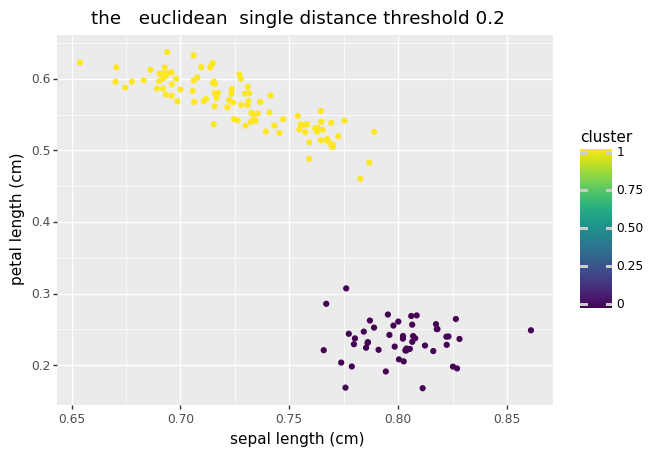

<ggplot: (8754532123117)>


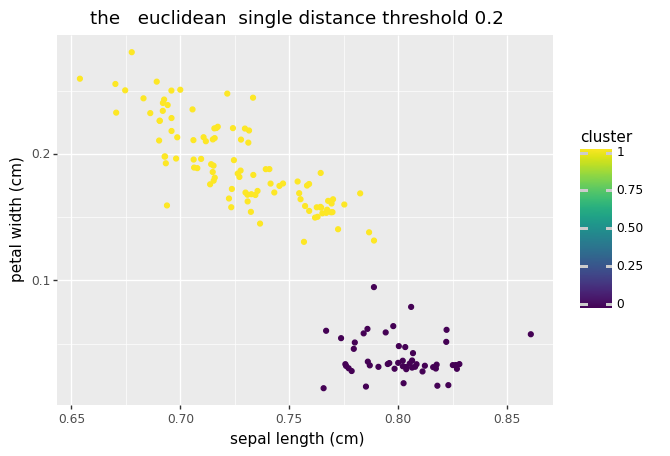

<ggplot: (8754532105609)>


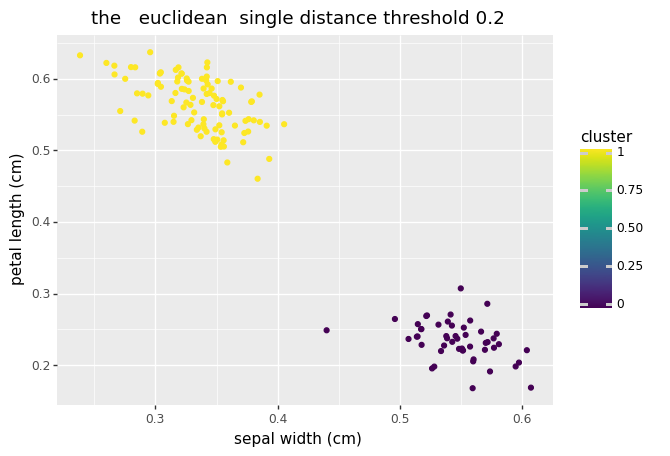

<ggplot: (8754531979057)>


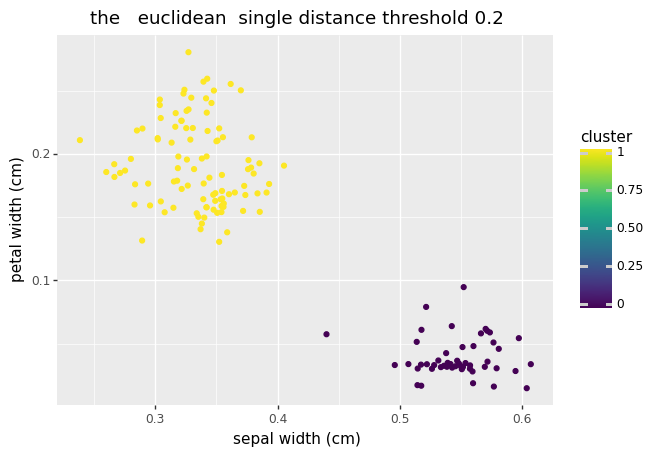

<ggplot: (8754552017729)>


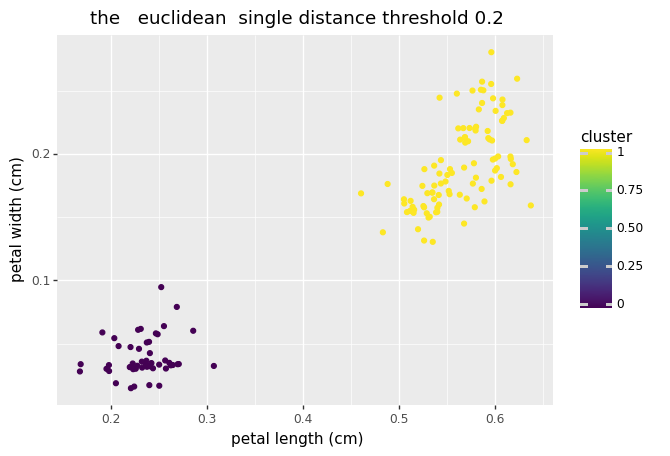

<ggplot: (8754532107721)>


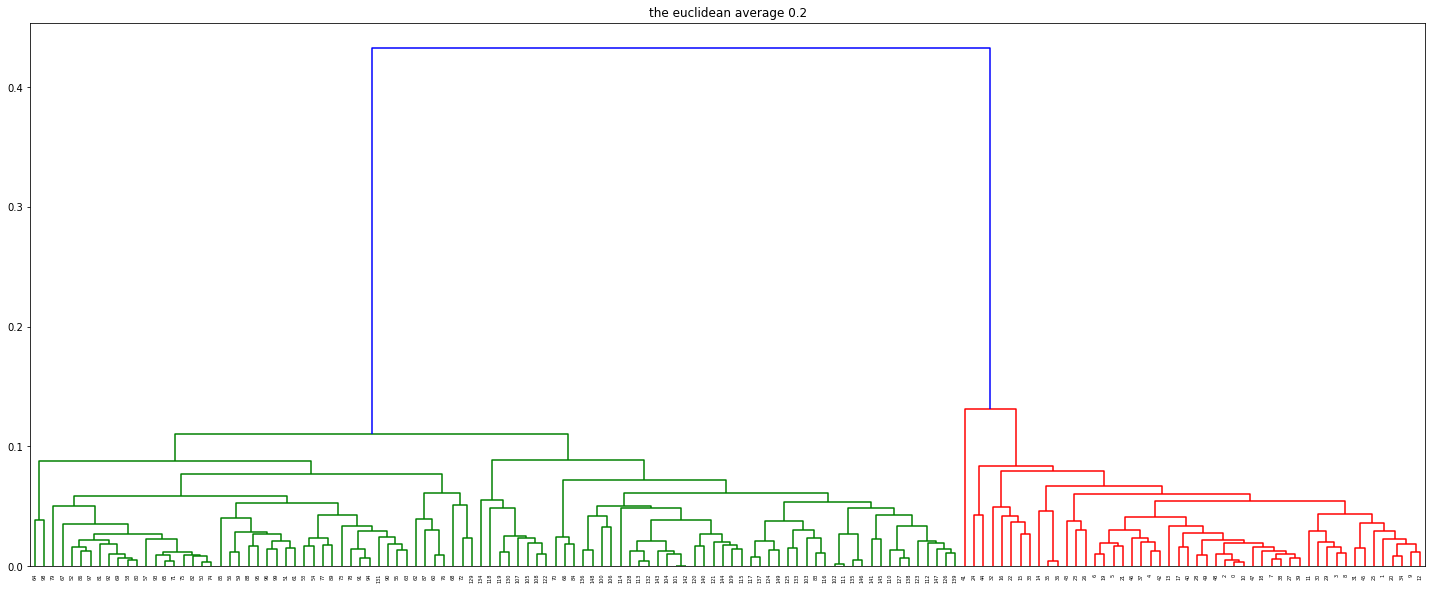

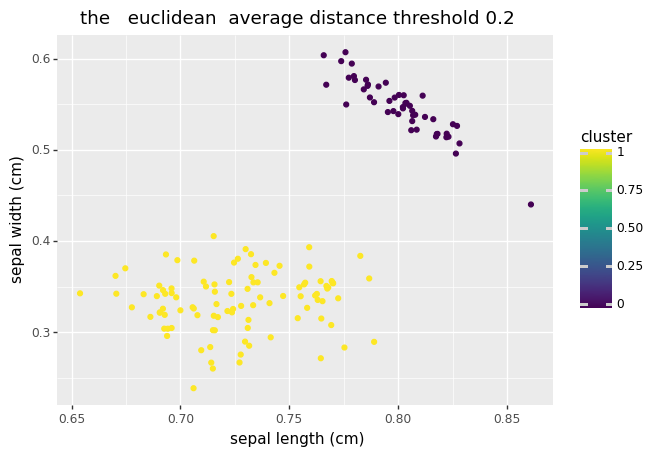

<ggplot: (8754531869313)>


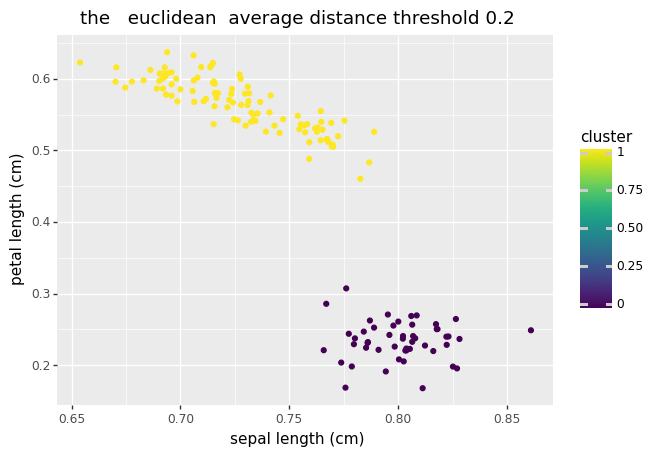

<ggplot: (8754531869317)>


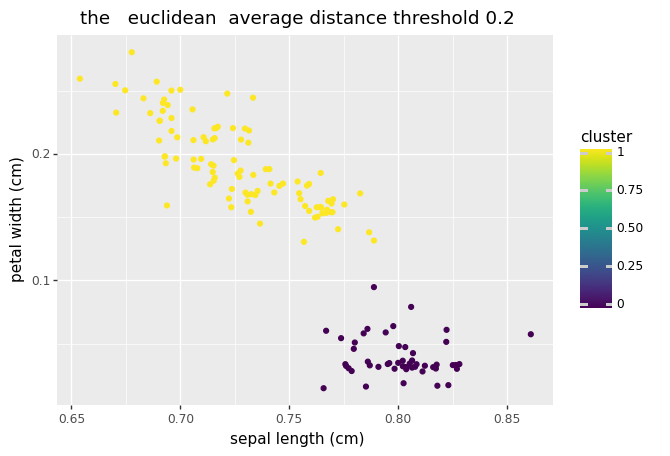

<ggplot: (8754531626501)>


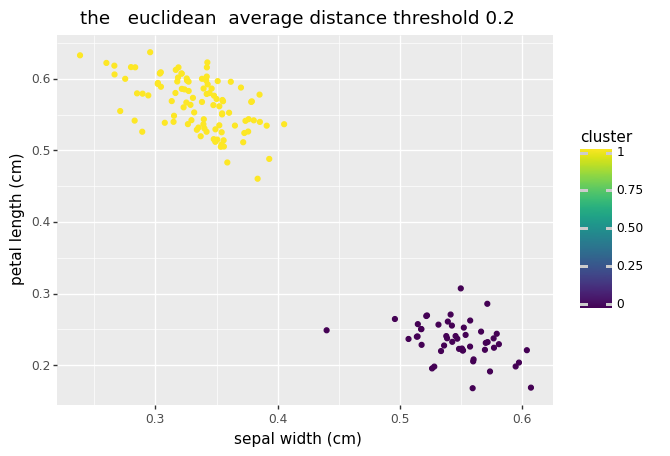

<ggplot: (8754531884029)>


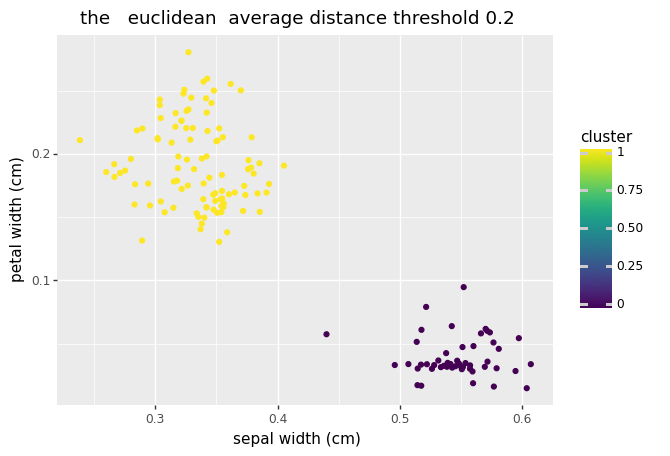

<ggplot: (8754531519501)>


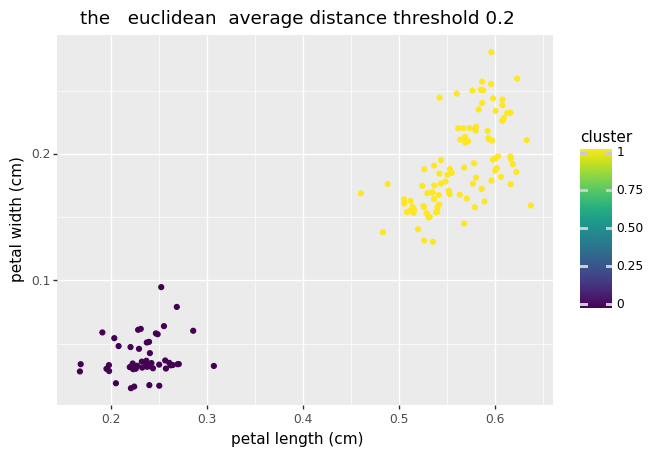

<ggplot: (8754531848901)>


In [26]:
max=0
affin=''
linkage1=''
dist_threshold=0
for x in ['cityblock','euclidean','cosine']:
  for y in ['single','average']:
    for j in np.arange(0.2, 0.4, 0.2):
      j=j.round(1)
      if 'cluster' in new_normalx.columns:
       new_normalx.drop('cluster', axis=1, inplace=True)
      model = AgglomerativeClustering(distance_threshold=j, n_clusters=None,affinity=x,linkage=y)
      model = model.fit(new_normalx)
      if(len(np.unique(model.labels_))!=1):
        sil_score=silhouette_score(new_normalx, model.labels_)
        if(max<sil_score):
          max=sil_score
          affin=x
          linkage1=y
          dist_threshold=j
        Z = linkage(new_normalx, y,metric=x)
        fig = plt.figure(figsize=(25, 10))
        plt.title("the"+" "+str(x)+" "+str(y)+" "+str(j))
        dn = dendrogram(Z,truncate_mode='level')
        plt.show()
        z=model.labels_
        new_normalx['cluster']=z
        count=len(new_normalx.columns)-1
        for a in range(len(new_normalx.columns)-1):
          for b in range(count-1):
            b=b+a+1 
            print(ggplot(new_normalx,aes(x=new_normalx.columns[a],y=new_normalx.columns[b],color='cluster'))+geom_point()+ggtitle('the ' + '  '+str(x) + '  '+str(y)+' '+'distance threshold'+' '+str(j)))
          count=count-1

In [27]:
print(max)
print(affin)
print(linkage1)
print(dist_threshold)

0.8192435078941299
cityblock
single
0.2



### **observation of the hierarichal clustering**

hierarchical cluster analysis is used to build a tree digram as shown in the figures above which is dendogram,the Sub-Cluster IDs are listed along the x-axis The y-axis measures inter-cluster distance.where the most similar(the pairs with the lowert distance)are joined together
 into one cluster, indicated by the horizontal line linking them. Next, we search for  the cases that have the next smallest inter-cluster distance, so they can be joined into one cluster and so on. 


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score 

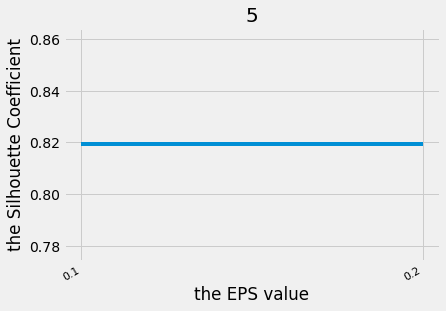

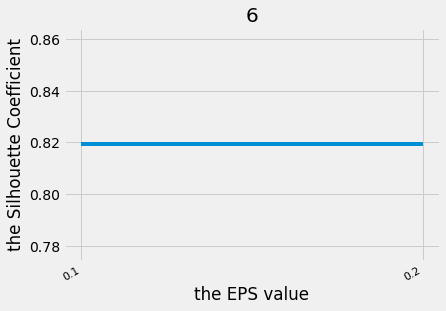

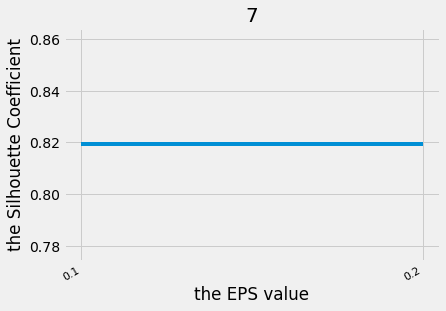

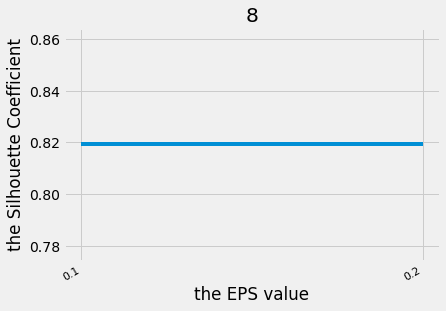

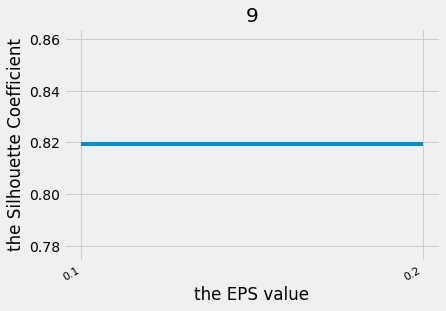

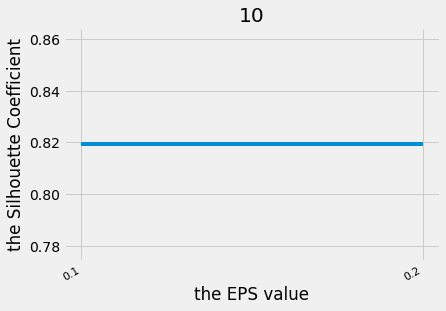

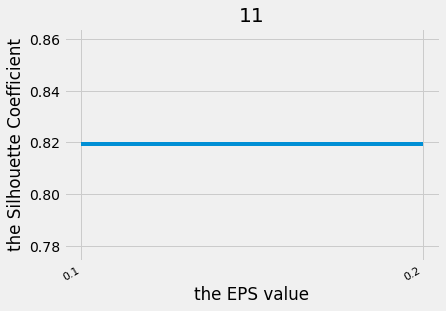

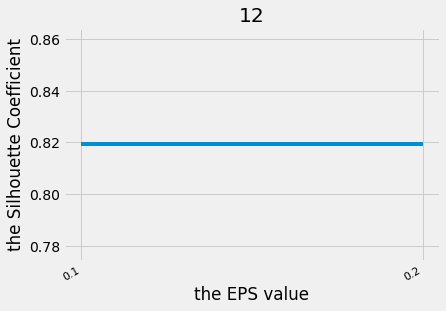

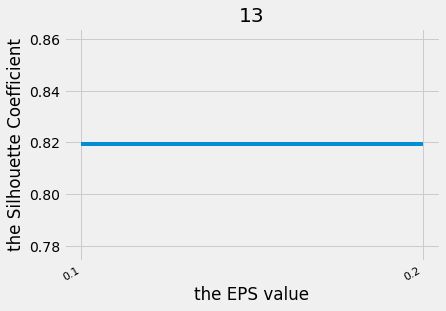

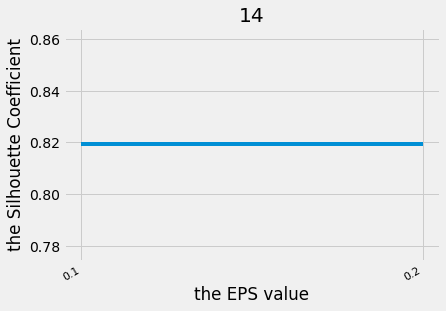

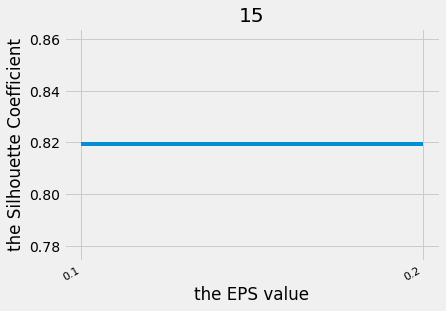

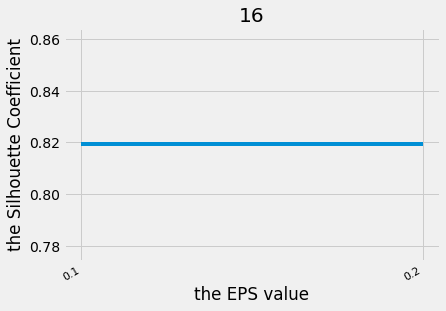

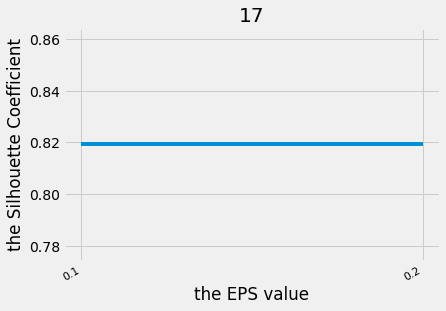

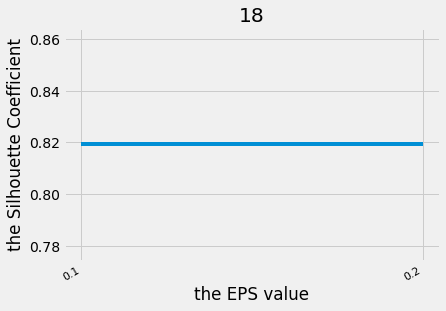

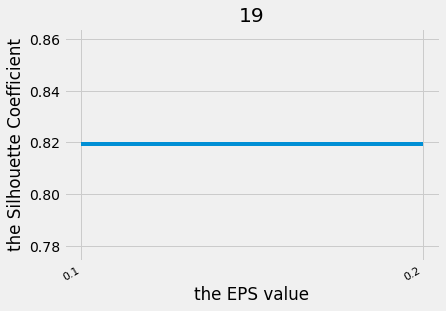

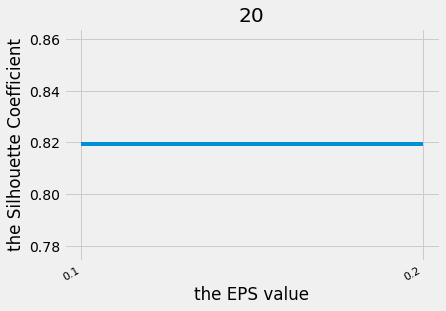

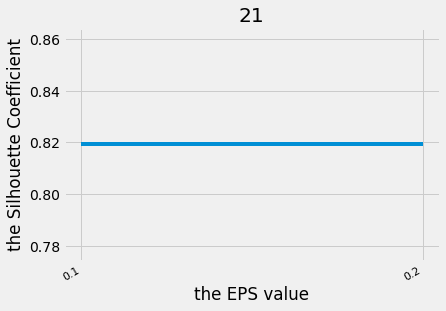

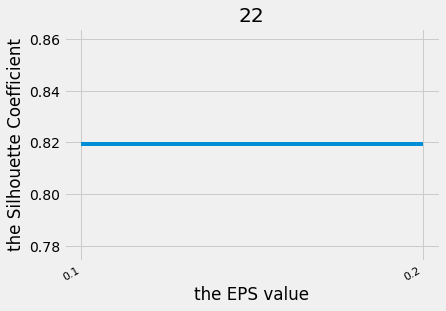

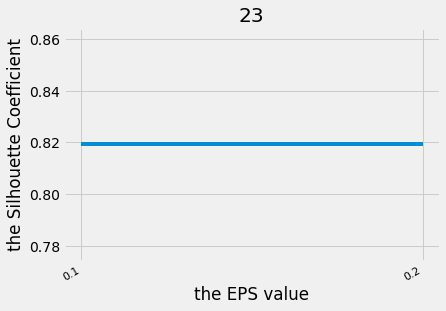

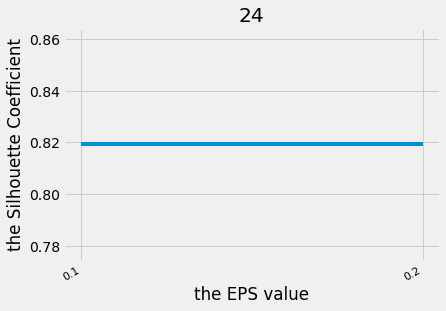

In [36]:
max_sil_coeff =0
best_eps=0
best_min_samples=0
for m in range(5,25,1):
  sil_coeff = []
  k_values=[]

  for k in np.arange(0.1, 3, 0.1): 
    k=k.round(1)
    dbscan = DBSCAN(eps=k, min_samples=m)


    if 'cluster' in new_normalx.columns:
       new_normalx.drop('cluster', axis=1, inplace=True)
    dbscan.fit(new_normalx)
    if (len(np.unique(dbscan.labels_))==1):
      continue  
    k_values.append(k)
    dbscan_sil = silhouette_score(new_normalx, dbscan.labels_)
    if (max_sil_coeff <= dbscan_sil): 
     max_sil_coeff =dbscan_sil
     best_eps=k
     best_min_samples=m
    sil_coeff.append(dbscan_sil)
  if(len(sil_coeff)!=0):
    ax= plt.subplot()   
    plt.style.use("fivethirtyeight")
    plt.title(m)
    plt.plot(k_values, sil_coeff)
    plt.xticks(k_values)
    plt.xticks(fontsize=11)
    plt.xlabel("the EPS value")
    plt.ylabel("the Silhouette Coefficient")
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
    plt.show()

In [37]:
print(max_sil_coeff)
print(best_eps)
print(best_min_samples)


0.8192435078941299
0.2
24


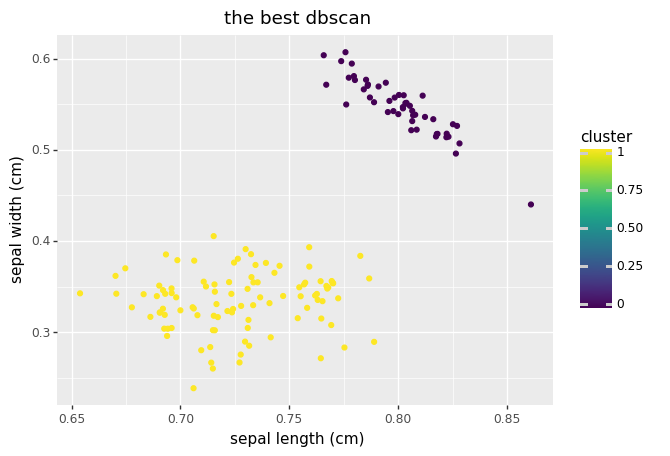

<ggplot: (8754531740017)>


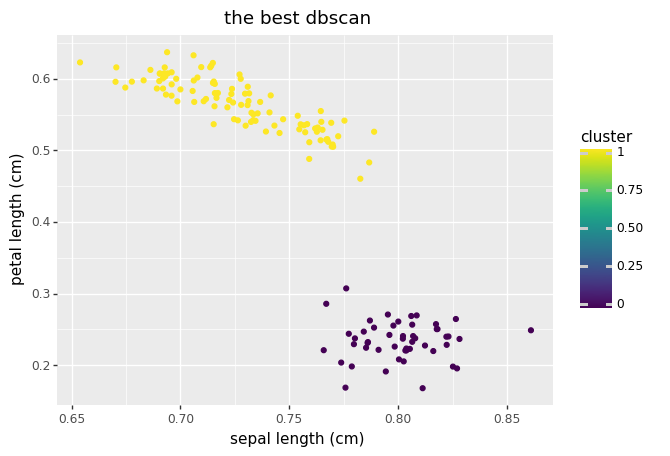

<ggplot: (8754531652645)>


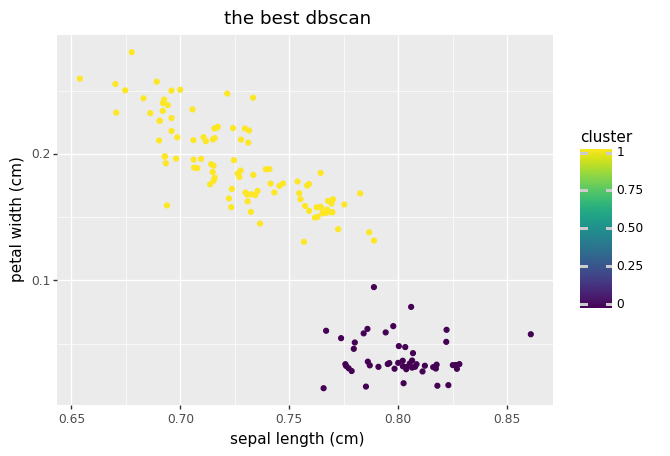

<ggplot: (8754531883801)>


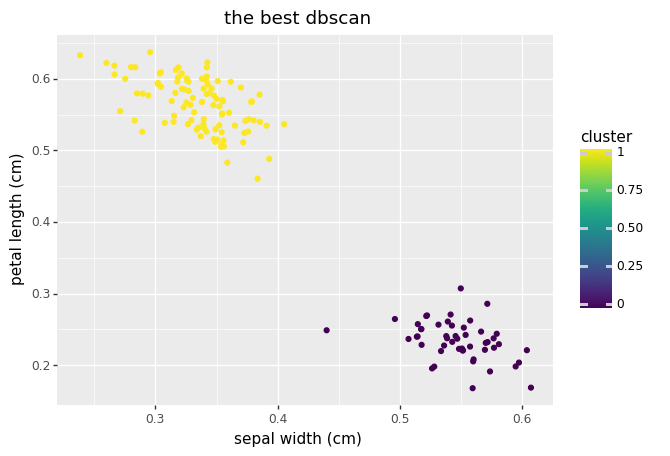

<ggplot: (8754531763445)>


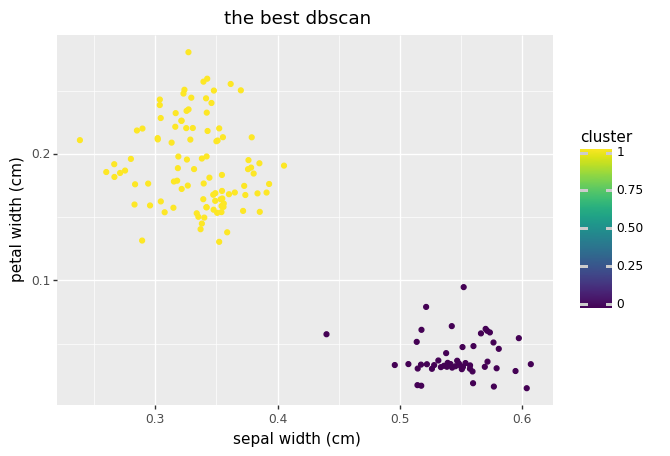

<ggplot: (8754531426229)>


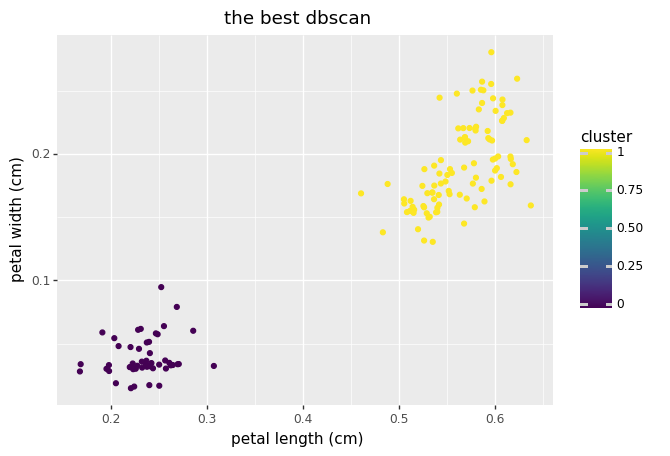

<ggplot: (8754531576693)>


In [38]:
  dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
  if 'cluster' in new_normalx.columns:
   new_normalx.drop('cluster', axis=1, inplace=True)
  dbscan.fit(new_normalx)
  z=dbscan.labels_ 
  new_normalx['cluster']=z
  count=len(new_normalx.columns)-1
  for i in range(len(new_normalx.columns)-1):
    for j in range(count-1):
      j=j+i+1 
      print(ggplot(new_normalx,aes(x=new_normalx.columns[i],y=new_normalx.columns[j],color='cluster'))+geom_point()+ggtitle('the best dbscan'))
    count=count-1